# Дипломная работа  по курсу Python. Новая версия задания

## PYDA- 10

1. Загрузите файл HR.csv в pandas dataframe

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns

In [193]:
import matplotlib.pyplot as plt

In [194]:
df = pd.read_csv('HR.csv')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).


In [196]:
metrics = df.describe()

In [197]:
mod = []

for col in df.columns:
    m = df[col].mode()[0]
    mod.append(m)
mod

[0.1, 0.55, 4, 135, 3, 0, 0, 0, 'sales', 'low']

In [198]:
metrics.loc['moda'] = mod[:-2]

In [199]:
metrics

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
moda,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [200]:
np.round_(df.corr(), decimals=2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


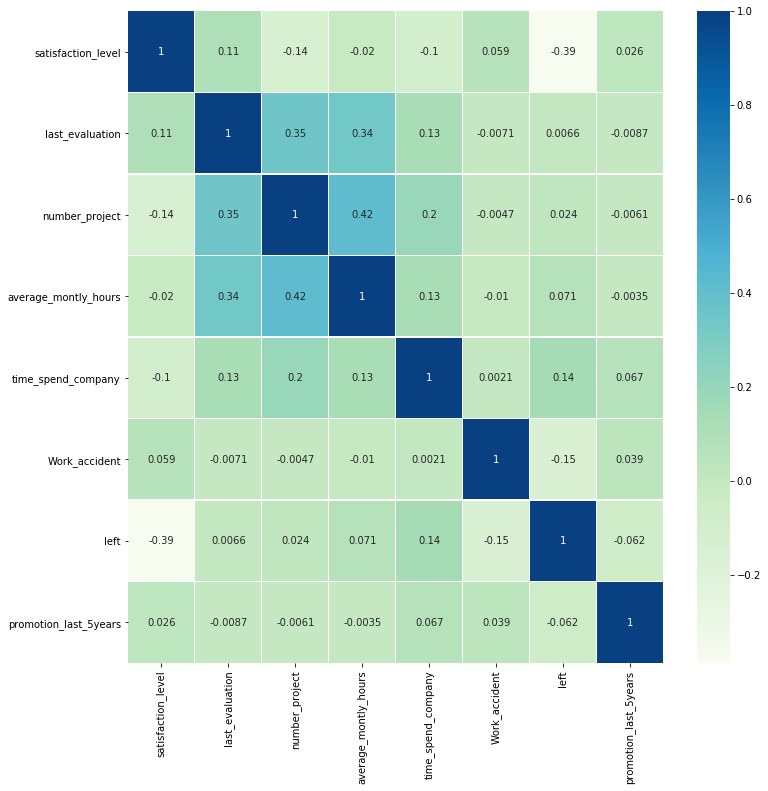

In [201]:
sns.heatmap(df.corr(),annot=True,cmap='GnBu',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Выводы: 2 самые скоррелированные  переменные - average_montly_hours и number_project; две наименее скоррелированные переменные -average_montly_hours и promotion_last_5years.

4. Рассчитайте, сколько сотрудников работает в каждом департаменте.

In [202]:
dep = df['department'].value_counts().reset_index()
dep

,index,department
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


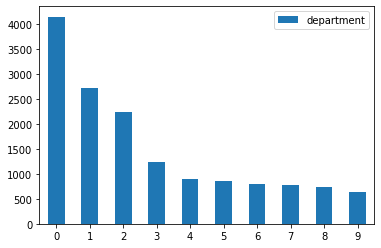

In [203]:
dep.plot(kind='bar', rot=0)

5. Показать распределение сотрудников по зарплатам.


In [204]:
salary = df.salary.value_counts()
salary

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

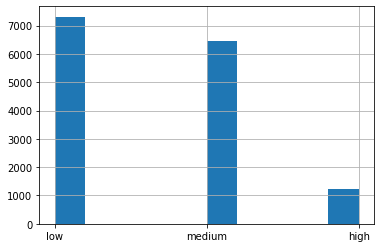

In [205]:
df.salary.hist()

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [206]:
salary_dept = df[['department', 'salary']].groupby(['department']).salary.value_counts()
salary_dept

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

In [208]:
salary_dept = df[['department', 'salary']]

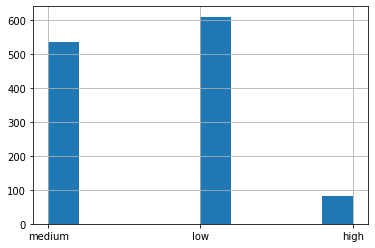

In [209]:
salary_dept [salary_dept.department == 'IT'].salary.hist()

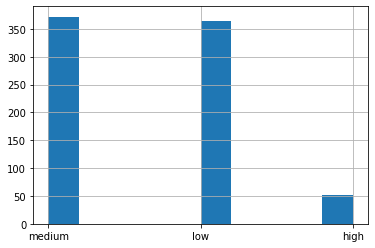

In [210]:
salary_dept [salary_dept.department == 'RandD'].salary.hist()


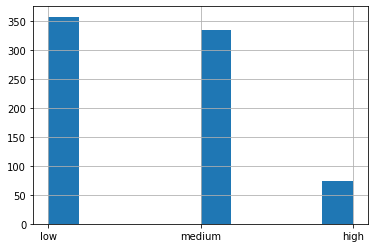

In [212]:
salary_dept [salary_dept.department == 'accounting'].salary.hist()

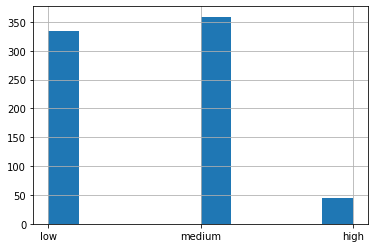

In [211]:
salary_dept [salary_dept.department == 'hr'].salary.hist()

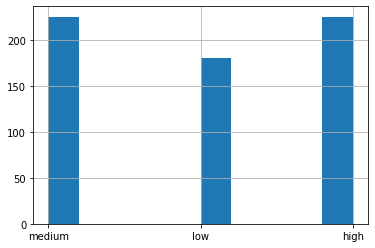

In [213]:
salary_dept [salary_dept.department == 'management'].salary.hist()

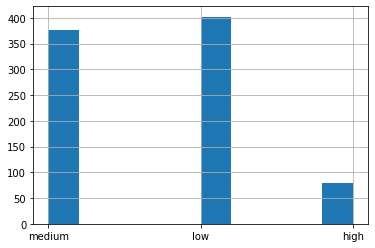

In [214]:
salary_dept [salary_dept.department == 'marketing'].salary.hist()


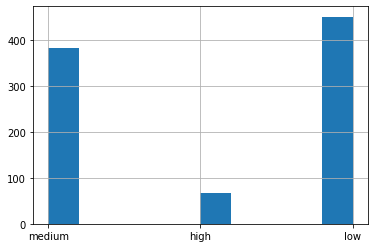

In [215]:
salary_dept [salary_dept.department == 'product_mng'].salary.hist()

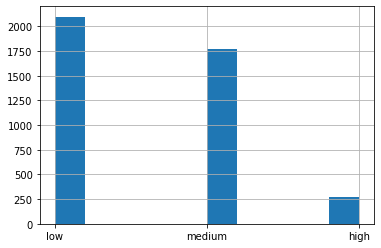

In [216]:
salary_dept [salary_dept.department == 'sales'].salary.hist()

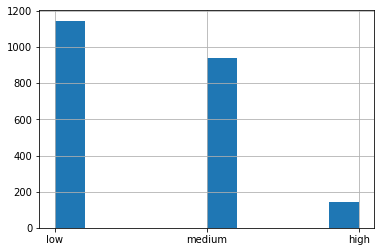

In [217]:
salary_dept [salary_dept.department == 'support'].salary.hist()

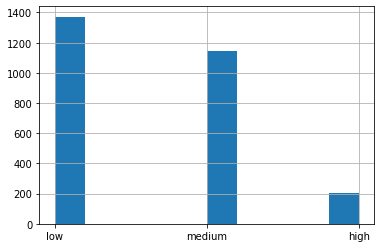

In [218]:
salary_dept [salary_dept.department == 'technical'].salary.hist()

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [219]:
df.groupby(['salary']).average_montly_hours.mean()

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

In [220]:
salary = df[['salary', 'average_montly_hours']].replace('low', 1)

In [221]:
salary.replace('medium', 2, inplace=True)
salary.replace('high', 3, inplace=True)

In [222]:
salary.corr() 

,salary,average_montly_hours
salary,1.000000,-0.002242
average_montly_hours,-0.002242,1.000000


Вывод: данные не подтверждают гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом, наоборот, они проводят меньше времени. Также не наблюдается зависимость между временем на работе и уровнем оклада.

8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
●Доля сотрудников с повышением за последние 5 лет
●Средняя степень удовлетворенности
●Среднее количество проектов

Для уволившихся:

In [223]:
df[df.left == 1].promotion_last_5years.value_counts()

0    3552
1      19
Name: promotion_last_5years, dtype: int64

In [224]:
df[df.left == 1].promotion_last_5years.value_counts(normalize=True)

0    0.994679
1    0.005321
Name: promotion_last_5years, dtype: float64

In [225]:
df[df.left == 1].satisfaction_level.mean()

0.44009801176140917

In [226]:
df[df.left == 1].number_project.mean()

3.8555026603192384

Для неуволившихся:

In [227]:
df[df.left == 0].promotion_last_5years.value_counts()

0    11128
1      300
Name: promotion_last_5years, dtype: int64

In [228]:
df[df.left == 0].promotion_last_5years.value_counts(normalize=True)

0    0.973749
1    0.026251
Name: promotion_last_5years, dtype: float64

In [229]:
df[df.left == 0].satisfaction_level.mean()

0.666809590479516

In [230]:
df[df.left == 0].number_project.mean()

3.786664333216661

9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)Оценить качество модели на тестовой выборки

In [231]:
model_data = df.iloc[:,0:-2]

model_data 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [232]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(model_data , test_size=0.2)

In [233]:
y_train, y_test = data_train['left'], data_test['left']

In [234]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [235]:
lda = LinearDiscriminantAnalysis()

In [236]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [237]:
lda.predict(data_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [238]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [239]:
result


,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2995,1,0
2996,1,0
2997,0,0
2998,1,0


In [240]:
from sklearn.metrics import accuracy_score

In [241]:
accuracy_score(y_test, lda.predict(data_test))

0.7463333333333333